<a href="https://colab.research.google.com/github/leticiabbacellar/Python/blob/main/Nuvem_de_palavras_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk wordcloud
!pip install spacy
!pip install pandas
!python -m spacy download pt_core_news_sm

import nltk
nltk.download('stopwords')
nltk.download('rslp')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import RSLPStemmer
import spacy
nlp = spacy.load("pt_core_news_sm")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 104.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
df= pd.read_csv ("/content/tweet_sentiment.csv")
df.info()

stopwords.words("english")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
tokenizer = ToktokTokenizer()
stopwords_ = set(stopwords.words('english'))

#Pré processamento de palavras= lowercasing, tokenização e stopwords)
tokens_totais = []


for tweet in df['tweet']:

    tokens = tokenizer.tokenize(tweet)

    tokens_filtrados = [token.lower() for token in tokens
                         if token.lower() not in stopwords_ and token.isalpha()]
    tokens_totais.extend(tokens_filtrados)


frequencia = Counter(tokens_totais)


top_20 = frequencia.most_common(20)
print(top_20)

[('day', 165), ('fantastic', 71), ('experience', 71), ('event', 69), ('starts', 69), ('pm', 69), ('absolutely', 69), ('loved', 69), ('happy', 67), ('news', 67), ('working', 67), ('home', 67), ('today', 66), ('tuesday', 66), ('update', 66), ('made', 66), ('wonderful', 63), ('cloudy', 63), ('outside', 63), ('great', 60)]


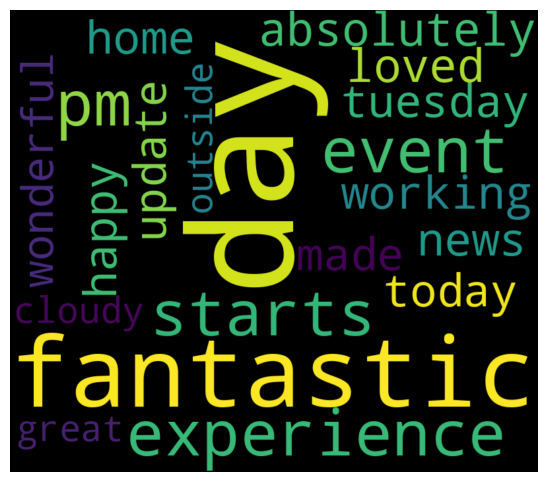

In [ ]:
top_20 = dict (frequencia.most_common(20))

wordcloud = WordCloud (width =800, height= 700, background_color= "black").generate_from_frequencies(top_20)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#stemming e lemmatização
from nltk.stem import RSLPStemmer

stemmer= RSLPStemmer()

stemmed_counts = {}

for word, count in top_20.items():
    stem = stemmer.stem(word)
    stemmed_counts[stem] = stemmed_counts.get(stem, 0) + count


print(stemmed_counts)

lemmatized_counts= {}

for word, count in top_20.items():
  doc = nlp(word)
  lemma = doc[0].lemma_
  lemmatized_counts[lemma] = lemmatized_counts.get(lemma, 0) + count

print(lemmatized_counts)


{'day': 165, 'fantastic': 71, 'experienc': 71, 'event': 69, 'start': 69, 'pm': 69, 'absolutely': 69, 'loved': 69, 'happy': 67, 'new': 67, 'working': 67, 'hom': 67, 'today': 66, 'tuesday': 66, 'updat': 66, 'mad': 66, 'wonderful': 63, 'cloudy': 63, 'outsid': 63, 'great': 60}
{'day': 165, 'fantastic': 71, 'experience': 71, 'event': 69, 'start': 69, 'pm': 69, 'absolutely': 69, 'loved': 69, 'happy': 67, 'news': 67, 'Working': 67, 'home': 67, 'today': 66, 'tuesday': 66, 'update': 66, 'made': 66, 'Wonderful': 63, 'cloudy': 63, 'outsidir': 63, 'great': 60}


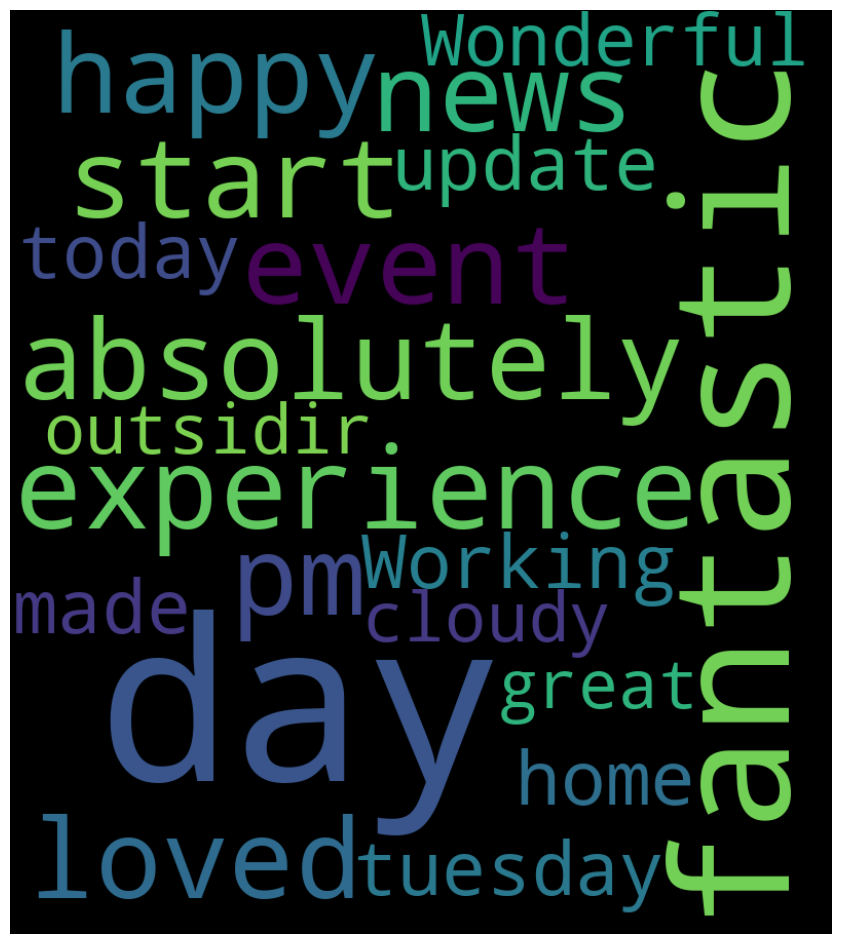

In [ ]:
wordcloud= WordCloud (width= 800, height= 900, background_color= "black").generate_from_frequencies(lemmatized_counts)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()